In [67]:
import pandas as pd               # уже знакомый вам пакет для работы с таблицами
import numpy as np                # смутно знакомый вам пакет для работы с матрицами
import matplotlib.pyplot as plt   # уже знакомый вам пакет для картинок 
import seaborn as sns 

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./task-3-boston_data.csv')  # подгружаем табличку 
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMM-ML-2023/data/flat.csv', sep='\t', index_col='n')  # подгружаем табличку 
print('Размер выборки:', df.shape)                          # смотрим на её размеры 
df.head( ) # Смотрим что лежит в табличке 

Размер выборки: (404, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


crim - уровень преступности на душу населения по городам

zn - доля земель под жилую застройку, зонированных под участки свыше 25 000 кв.м.

indus - доля акров неторгового бизнеса на город.

chas - фиктивная переменная реки Чарльз (1, если участок граничит с рекой; 0 в противном случае)

nox - концентрация оксидов азота (частей на 10 млн)

rm - среднее количество комнат в жилом помещении

age - доля жилых единиц, построенных до 1940 г.

dis - взвешенные расстояния до пяти центров занятости Бостона.

rad - индекс доступности к радиальным магистралям

tax - полная ставка налога на имущество за 10 000 долларов США.

ptratio - соотношение учеников и учителей по городам

black - 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.

lstat - % более низкий статус населения

medv - Средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

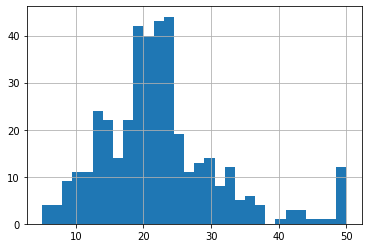

In [11]:
df.medv.hist(bins=30);

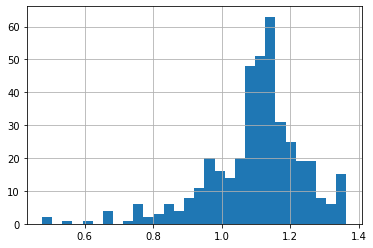

In [13]:
df['medv'] = np.log(df['medv'])
df.medv.hist(bins=30);

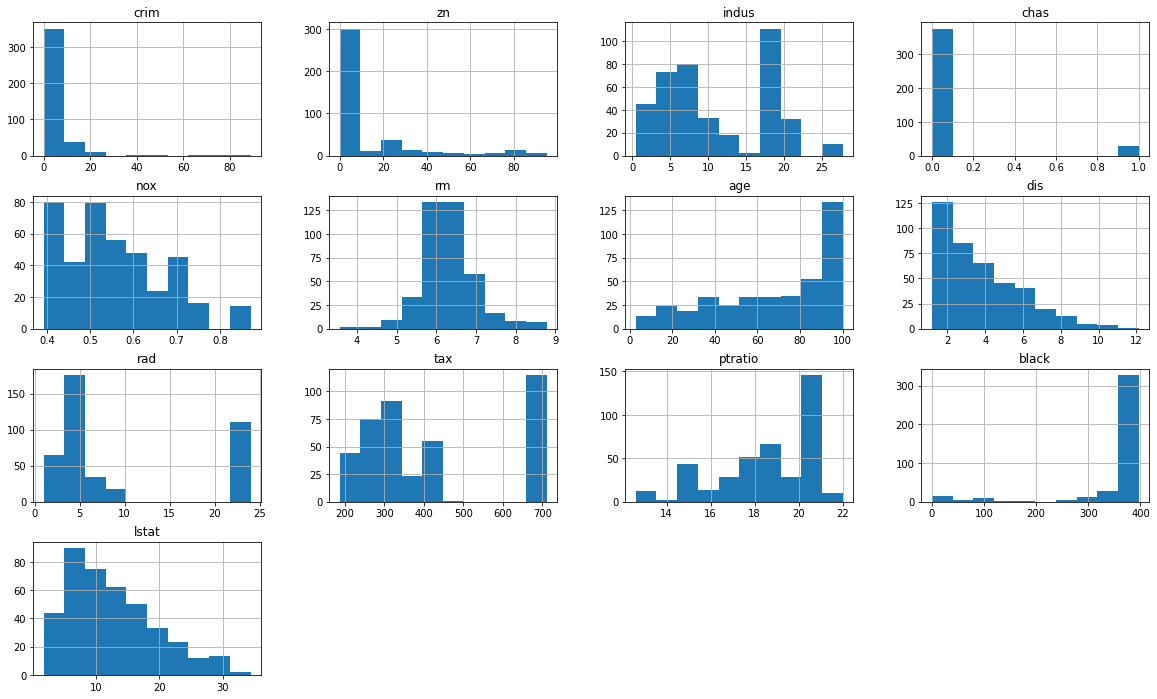

In [14]:
df.drop('medv',axis=1).hist(figsize=(20, 12));

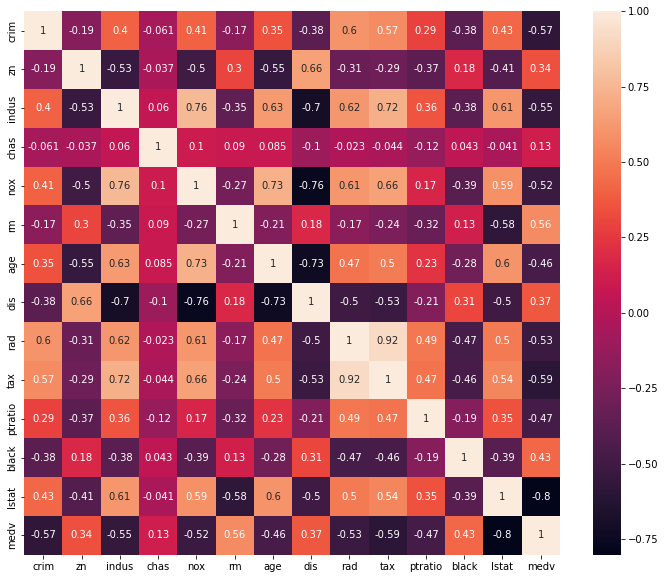

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True);

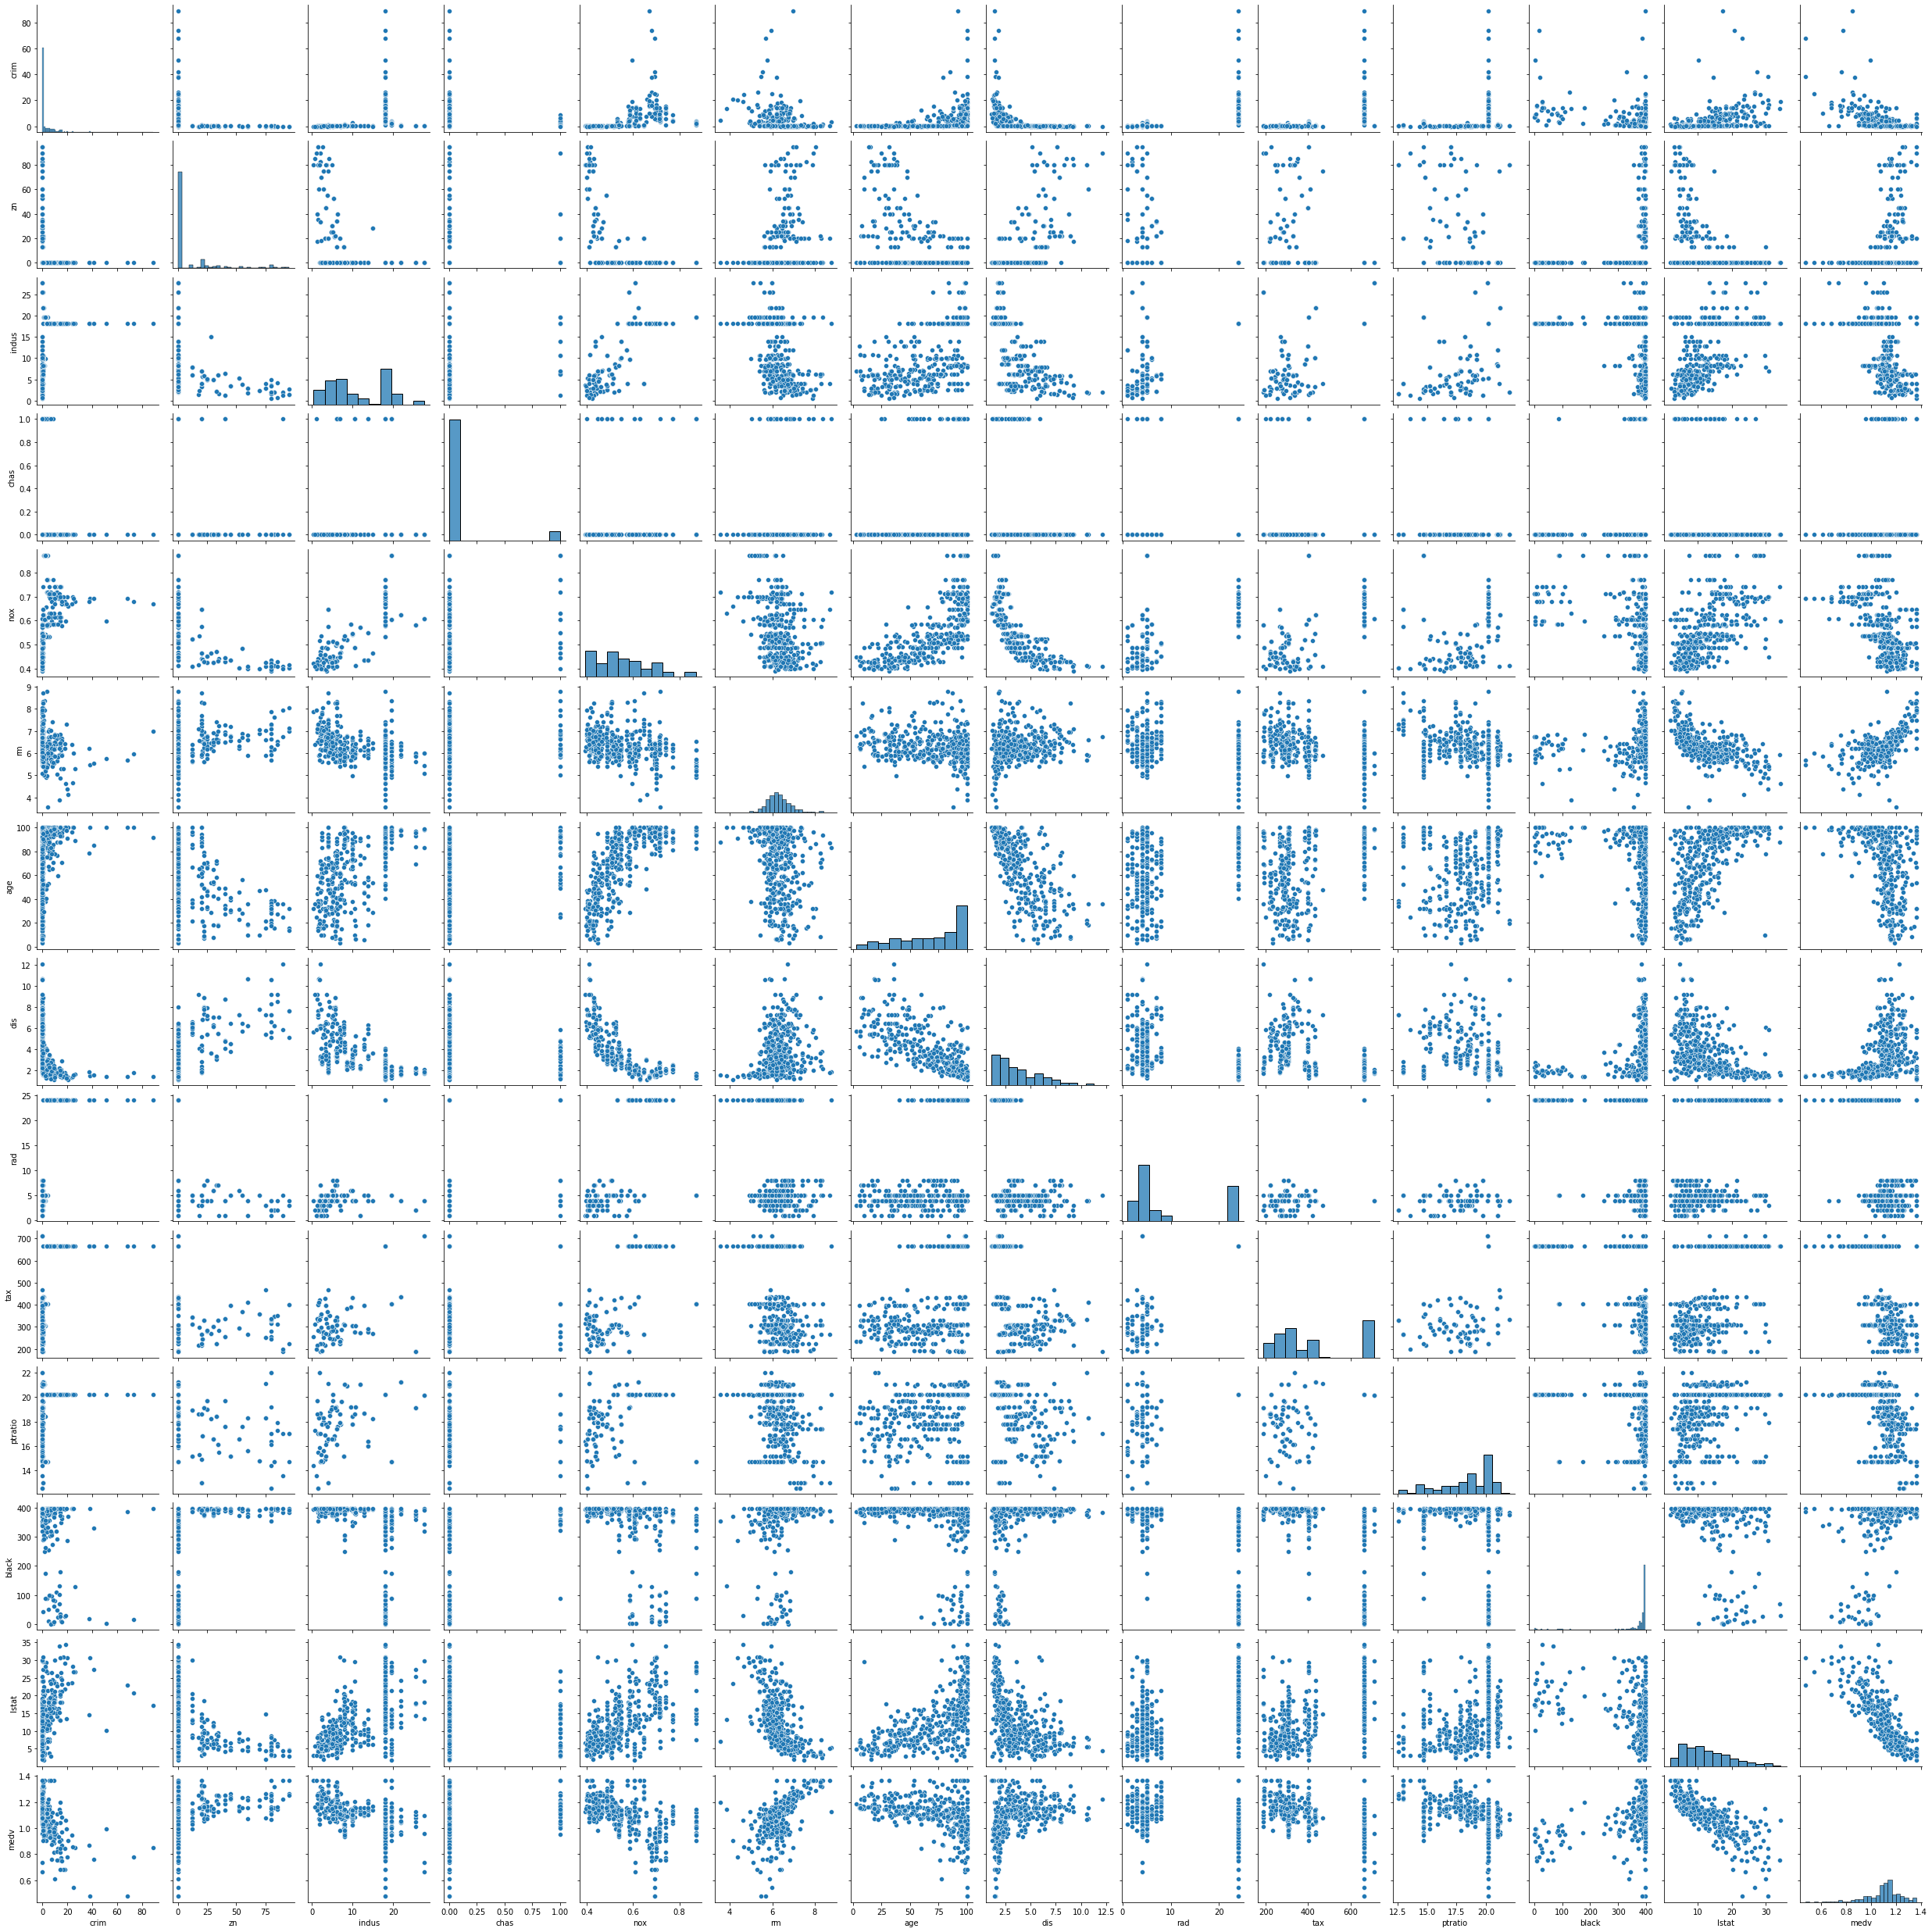

In [20]:
sns.pairplot(df)

In [58]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

In [59]:
df_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
346,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86,1.252630
314,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,1.364055
334,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,1.193781
120,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64,1.022026
38,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01,0.932795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2.33099,0.0,19.58,0.0,0.871,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32,1.057512
64,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16,1.141396
245,0.07978,40.0,6.41,0.0,0.447,6.482,32.1,4.1403,4.0,254.0,17.6,396.90,7.19,1.215132
241,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,0.953685


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_train)

StandardScaler()

In [60]:
df_train_scale = scaler.transform(df_train[['crim', 'zn', 'indus', 'chas', 'nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']])

df_test_scale = scaler.transform(df_test[['crim', 'zn', 'indus', 'chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']])

In [61]:
df_train[['crim', 'zn', 'indus', 'chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']] = df_train_scale
df_test[['crim', 'zn', 'indus', 'chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']] = df_test_scale

In [63]:
print(df_train.shape) 
print(df_test.shape) 

(282, 14)
(122, 14)


In [70]:
y_train = df_train.medv
y_test = df_test.medv

X_train = df_train.drop('medv', axis=1)
X_test = df_test.drop('medv', axis=1)

In [73]:
y_mean = np.mean(y_train)                   
y_pred_naive = np.ones(len(y_test)) * y_mean
y_pred_naive[:5]

array([0.06965998, 0.06965998, 0.06965998, 0.06965998, 0.06965998])

In [74]:
from sklearn import metrics

In [75]:
metrics.mean_absolute_error(y_test, y_pred_naive)

0.7572332345316892

In [76]:
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

0.8092317489761567

In [77]:
metrics.mean_squared_error(y_test, y_pred_naive)

1.2663560647794119

In [78]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

1.5976518870349514

In [79]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)))

1.2639825501307174

In [80]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

139.96108121958298

In [81]:
metrics.r2_score(y_test, y_pred_naive)

-0.0169179305291125

In [82]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [83]:
print_metrics(y_test, y_pred_naive)

MAE: 0.8092317489761567
RMSE: 1.2639825501307174
R2: -0.0169179305291125
MAPE: 139.96108121958298


## Строим нашу первую регрессию!

In [86]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()

model_regression.fit(X_train, y_train)

y_pred_regr = model_regression.predict(X_test)

In [87]:
print_metrics(y_test,y_pred_regr)

MAE: 0.30459029390352893
RMSE: 0.5619238975680095
R2: 0.7297364746453772
MAPE: 200.45077450792837


In [90]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
346,-0.411631,1.144304,-0.732329,-0.268781,-1.045012,0.980932,-1.755297,0.771320,-0.362538,-0.490099,-1.167242,0.361493,-1.085598
314,-0.420118,3.356183,-1.592687,-0.268781,-1.142270,2.267214,-1.250886,0.845943,-0.698840,-0.920490,-1.984977,0.400759,-1.358049
334,-0.407244,0.110492,-0.460315,-0.268781,-0.240419,-0.185797,1.010150,0.989806,-0.586739,-0.594788,-1.600161,0.428348,0.974364
120,-0.161971,-0.490562,-0.150096,-0.268781,-0.063585,-1.912844,-1.046299,-0.644126,-0.698840,-0.635501,-0.060895,-0.051621,0.035921
38,0.038246,-0.490562,1.103002,-0.268781,1.430660,-0.468117,0.720907,-0.614982,1.543172,1.469925,0.804942,-3.564542,0.954183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,-0.191953,-0.490562,1.329170,-0.268781,2.827646,-1.606037,0.929021,-1.115481,-0.586739,-0.059708,-1.840671,0.015957,2.296257
64,-0.417339,0.855798,0.635382,-0.268781,-0.770920,0.203113,-0.488977,-0.098148,-0.698840,-0.833248,-0.157099,0.408819,-0.609889
245,-0.413622,1.432810,-0.683427,-0.268781,-0.921228,0.260729,-1.247358,0.127767,-0.698840,-0.926306,-0.445712,0.428348,-0.749719
241,0.239993,-0.490562,1.103002,-0.268781,1.430660,0.645317,0.886692,-0.737368,1.543172,1.469925,0.804942,-3.669525,0.727861


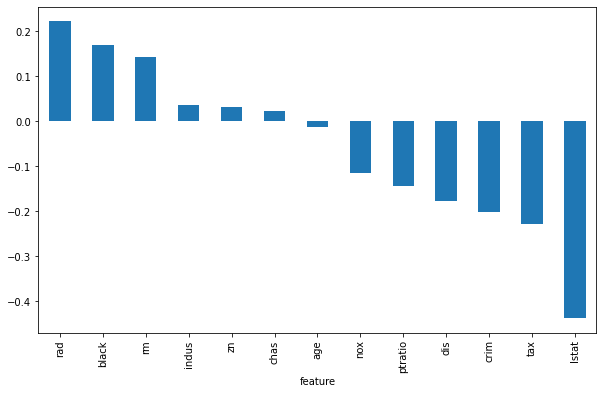

In [94]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar(figsize=(10, 6));

## Строим Lasso-регрессию 

In [95]:
from sklearn.linear_model import Lasso

model_simplelasso = Lasso()

model_simplelasso.fit(X_train, y_train)

y_pred_lasso = model_simplelasso.predict(X_test)

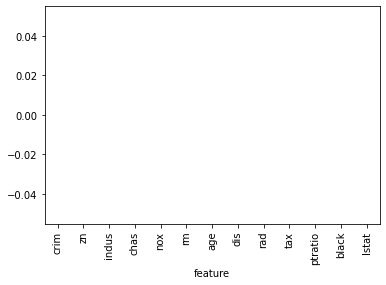

In [98]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

In [99]:
print_metrics(y_test,y_pred_lasso)

MAE: 0.8092317489761567
RMSE: 1.2639825501307174
R2: -0.0169179305291125
MAPE: 139.96108121958298


## Подбор гиперпараметра для Lasso-регрессии

In [100]:
from sklearn.model_selection import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


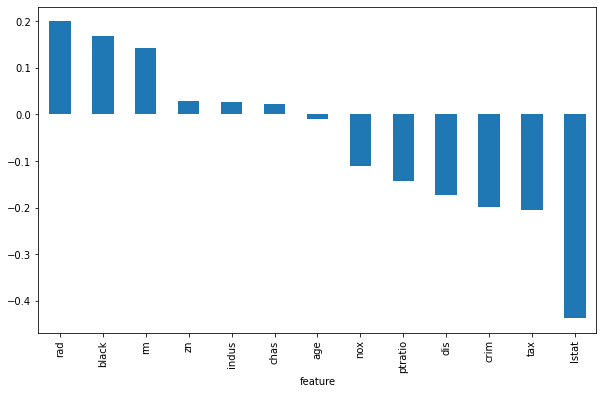

In [102]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar(figsize=(10, 6));

In [103]:
print_metrics(y_test,y_pred_lasso)

MAE: 0.30402730652057064
RMSE: 0.563228389026907
R2: 0.728166736147446
MAPE: 202.7495753909501


In [104]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
y_pred_lasso_cv = lasso_cv.predict(X_test)

Лучшее значение параметра: 0.0008377647743972596


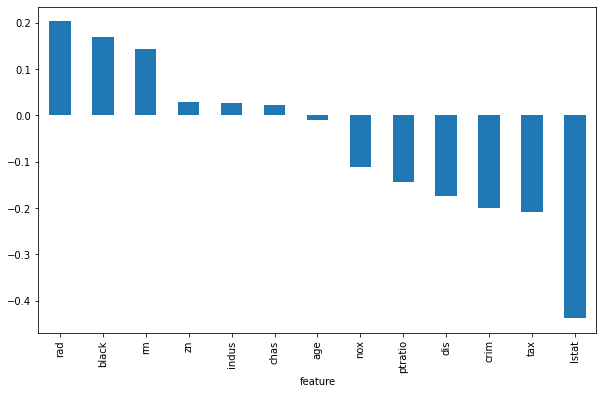

In [105]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": lasso_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar(figsize=(10, 6));

In [106]:
print_metrics(y_test, y_pred_lasso_cv)

MAE: 0.30411847984753326
RMSE: 0.5629987758030742
R2: 0.7284334090441912
MAPE: 202.3761235046049
